In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수지원
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. 데이터 준비

In [2]:
data = pd.read_csv("data/주소포함_전체정리.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_6472\314917726.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/주소포함_전체정리.csv")


In [3]:
data.head(3)

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일,구분,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415070 entries, 0 to 415069
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RECV_DEPT_NM   415070 non-null  object 
 1   RECV_CPLT_DM   415070 non-null  object 
 2   NPA_CL         415070 non-null  int64  
 3   EVT_STAT_CD    415070 non-null  int64  
 4   EVT_CL_CD      415070 non-null  int64  
 5   RPTER_SEX      415070 non-null  object 
 6   HPPN_PNU_ADDR  415070 non-null  object 
 7   HPPN_X         415053 non-null  float64
 8   HPPN_Y         415053 non-null  float64
 9   SME_EVT_YN     136673 non-null  object 
 10  요일             415070 non-null  object 
 11  구분             415070 non-null  object 
 12  시/군/구          415070 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 41.2+ MB


## 1-1. 칼럼 명 수정

In [5]:
data.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", 
                       "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별",
                       "HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [6]:
data.head(3)

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415070 entries, 0 to 415069
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   접수부서코드  415070 non-null  object 
 1   접수완료일시  415070 non-null  object 
 2   경찰청구분   415070 non-null  int64  
 3   사건상태코드  415070 non-null  int64  
 4   사건종별코드  415070 non-null  int64  
 5   신고성별    415070 non-null  object 
 6   발생지점    415070 non-null  object 
 7   발생좌표x   415053 non-null  float64
 8   발생좌표y   415053 non-null  float64
 9   동일사건여부  136673 non-null  object 
 10  요일      415070 non-null  object 
 11  구분      415070 non-null  object 
 12  시/군/구   415070 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 41.2+ MB


## 1-2. 데이터 타입 변경

In [8]:
data['접수완료일시'] = pd.to_datetime(data['접수완료일시'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415070 entries, 0 to 415069
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   접수부서코드  415070 non-null  object        
 1   접수완료일시  415070 non-null  datetime64[ns]
 2   경찰청구분   415070 non-null  int64         
 3   사건상태코드  415070 non-null  int64         
 4   사건종별코드  415070 non-null  int64         
 5   신고성별    415070 non-null  object        
 6   발생지점    415070 non-null  object        
 7   발생좌표x   415053 non-null  float64       
 8   발생좌표y   415053 non-null  float64       
 9   동일사건여부  136673 non-null  object        
 10  요일      415070 non-null  object        
 11  구분      415070 non-null  object        
 12  시/군/구   415070 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 41.2+ MB


## 1-3. "접수시간대" 컬럼 추가

In [10]:
data["접수시간대"] = data['접수완료일시'].dt.hour

In [11]:
data.head(3)

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구,접수시간대
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시,0
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시,0
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동,0


# 2. 각 사건의 접수시간대별 그래프

In [16]:
a406=data[data["사건종별코드"]==406] #음주운전

a402=data[data["사건종별코드"]==402] #교통불편

a403= data[data["사건종별코드"]==403] #교통위반

a401=data[data["사건종별코드"]==401] #교통사고(사망하지도 않았고 뺑소니도 아닌 것)

a404=data[data["사건종별코드"]==404] #사망 대형사고

a405=data[data["사건종별코드"]==405] #인피도주

## 2-1. 교통사고 접수시간대별 그래프

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'교통사고 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

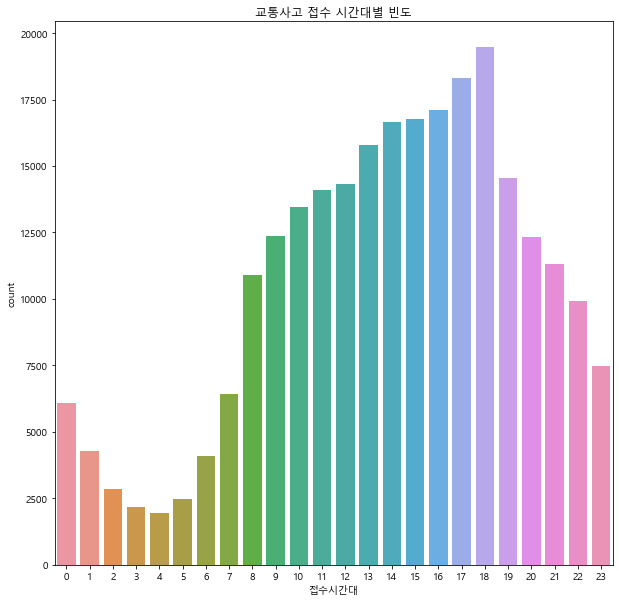

In [14]:
plt.figure(figsize=(10,10))
plt.title("교통사고 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a401)

## 2-2. 교통불편 접수시간대별 그래프

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'교통불편 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

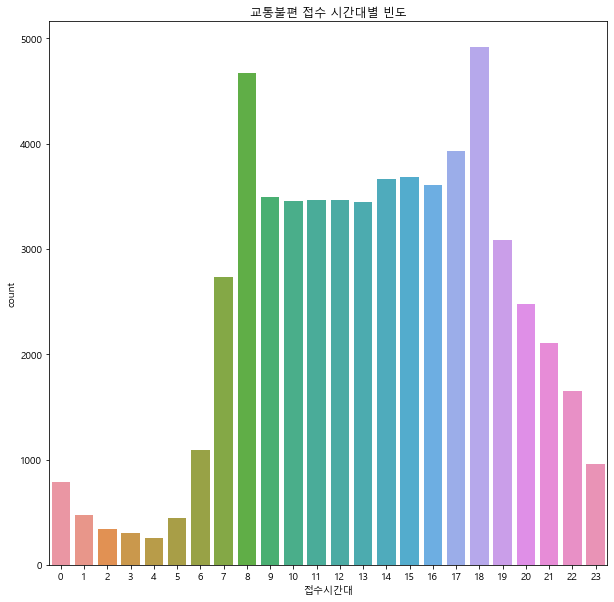

In [17]:
plt.figure(figsize=(10,10))
plt.title("교통불편 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a402)

## 2-3. 교통위반 접수시간대별 그래프

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'교통위반 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

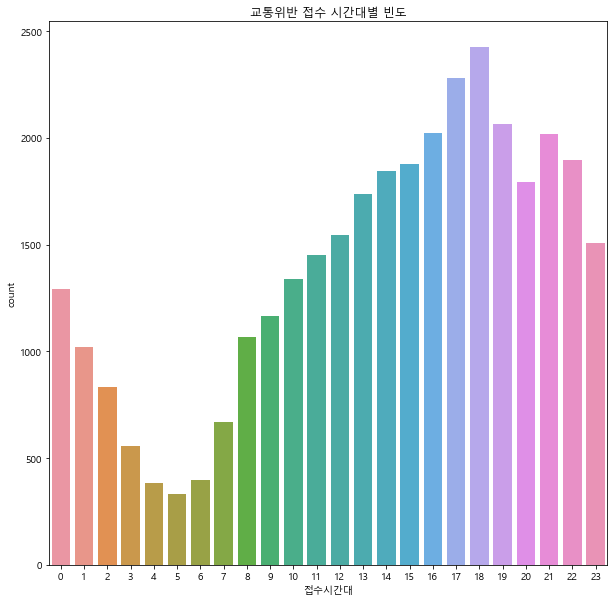

In [18]:
plt.figure(figsize=(10,10))
plt.title("교통위반 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a403)

## 2-4. 사망대형사고 접수시간대별 그래프

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'사망대형사고 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

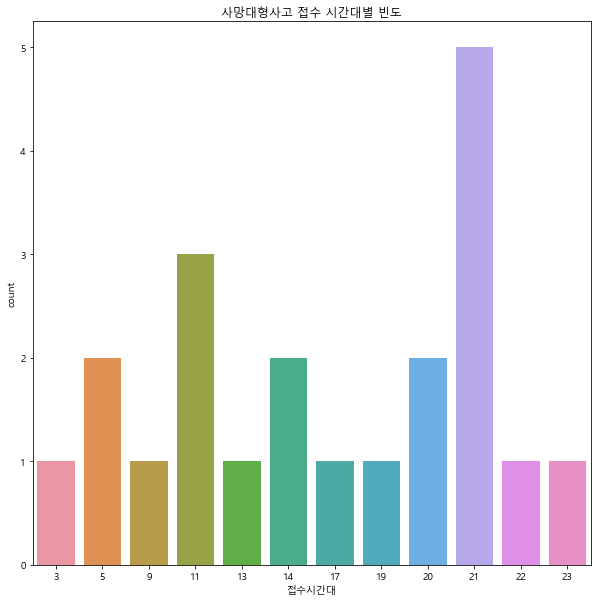

In [19]:
plt.figure(figsize=(10,10))
plt.title("사망대형사고 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a404)

## 2-5. 인피도주 접수시간대별 그래프

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'인피도주 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

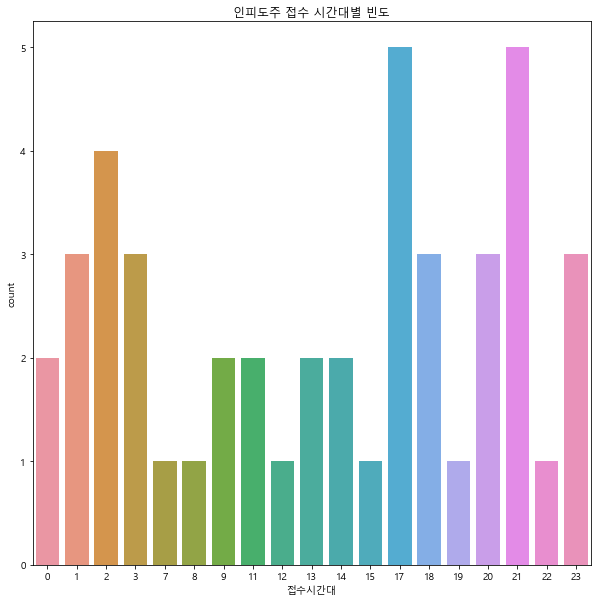

In [20]:
plt.figure(figsize=(10,10))
plt.title("인피도주 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a405)

## 2-6. 음주운전 접수시간대별 그래프

C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'음주운전 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

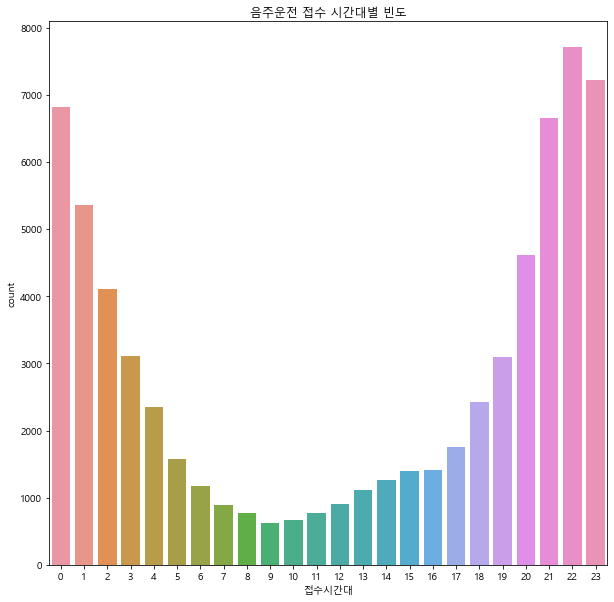

In [21]:
plt.figure(figsize=(10,10))
plt.title("음주운전 접수 시간대별 빈도")
sns.countplot("접수시간대", data=a406)